# ANALYZE BIOMODELS SUBNETS

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tellurium as te

import pySubnetSB.constants as cn
from pySubnetSB.network import Network

# Data Preparation

In [2]:
PATH = os.path.join(cn.PROJECT_DIR, "biomodels_subnets.csv")
df = pd.read_csv(PATH)
df.head()

,reference_name,target_name,reference_network,induced_network,name_dct,num_assignment_pair
0,BIOMD0000000191,BIOMD0000000634,NaN,NaN,NaN,NaN
1,BIOMD0000000191,BIOMD0000000152,NaN,NaN,NaN,NaN
2,BIOMD0000000191,BIOMD0000000146,NaN,NaN,NaN,NaN
3,BIOMD0000000191,BIOMD0000000608,NaN,NaN,NaN,NaN
4,BIOMD0000000191,BIOMD0000000807,NaN,NaN,NaN,NaN


In [3]:
REFERENCE_NAMES = (df['reference_name'].unique())
NUM_REFERENCE = len(REFERENCE_NAMES)
TARGET_NAMES = (df['target_name'].unique())
NUM_TARGET = len(TARGET_NAMES)
NUM_REFERENCE, NUM_TARGET

(187, 492)

In [4]:
SUBNET_DF = df[df['num_assignment_pair'] > 0]
SUBNET_DF = SUBNET_DF.copy()
SUBNET_DF = SUBNET_DF.reset_index()
SUBNET_DF.head()

,index,reference_name,target_name,reference_network,induced_network,name_dct,num_assignment_pair
0,1131,BIOMD0000000224,BIOMD0000000939,"BIOMD0000000224: 4 species, 6 reactions\n JCh...","BIOMD0000000224_BIOMD0000000939: 4 species, 6 ...","{""species_names"": {""CaI"": ""APC_Ccdc20_inactive...",36.0
1,1195,BIOMD0000000224,BIOMD0000000269,"BIOMD0000000224: 4 species, 6 reactions\n JCh...","BIOMD0000000224_BIOMD0000000269: 4 species, 6 ...","{""species_names"": {""CaI"": ""Re_star"", ""IP3"": ""P...",36.0
2,1205,BIOMD0000000224,BIOMD0000000056,"BIOMD0000000224: 4 species, 6 reactions\n JCh...","BIOMD0000000224_BIOMD0000000056: 4 species, 6 ...","{""species_names"": {""CaI"": ""IEP"", ""IP3"": ""CLN2""...",120.0
3,1326,BIOMD0000000224,BIOMD0000000704,"BIOMD0000000224: 4 species, 6 reactions\n JCh...","BIOMD0000000224_BIOMD0000000704: 4 species, 6 ...","{""species_names"": {""CaI"": ""Chk1P"", ""IP3"": ""p53...",4.0
4,1340,BIOMD0000000224,BIOMD0000000856,"BIOMD0000000224: 4 species, 6 reactions\n JCh...","BIOMD0000000224_BIOMD0000000856: 4 species, 6 ...","{""species_names"": {""CaI"": ""SBFu"", ""IP3"": ""CLN""...",4.0


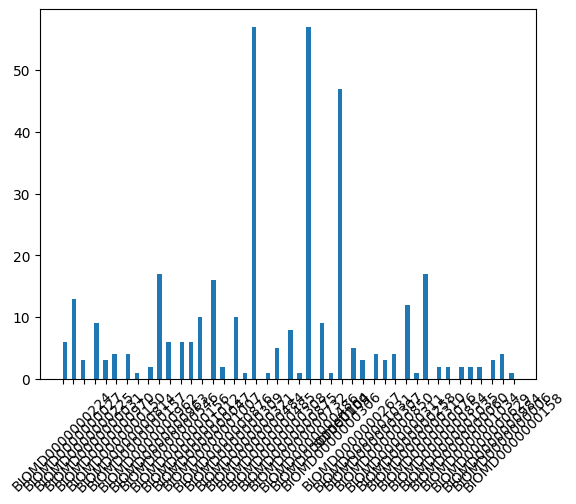

In [5]:
# Number of targets
_ = plt.hist(SUBNET_DF['reference_name'], bins=100)
_ = plt.xticks(rotation=45)

In [6]:
SUBNET_DF.to_csv("subnet.csv")

In [13]:
def makeAntimony(model_name:str, is_reference:bool=True, is_roadrunner_loadable:bool=False):
    """
    Transforms the string in a "network" cell into an antimony model
    """
    if is_reference:
        name_col = 'reference_name'
        network_col = 'reference_network'
    else:
        name_col = 'target_name'
        network_col = 'induced_network'
    models =  SUBNET_DF[SUBNET_DF[name_col] == model_name][network_col].values
    if len(models) == 0:
        return None
    model = models[0]
    if is_roadrunner_loadable:
        pos = model.index('tions\n')
        model = model[pos+7:]
        model = model.replace('\n', ';1\n')
        model += ";1;"
    return model

# TESTS
model = makeAntimony('BIOMD0000000224', is_roadrunner_loadable=True)
rr = te.loada(model)
model = makeAntimony('BIOMD0000000030')
assert(model is None)
print("OK!")

OK!


In [17]:
# Print all of the reference models that appear in targets
for name in REFERENCE_NAMES:
    result = makeAntimony(name)
    if result is not None:
        print(result + '\n\n')

BIOMD0000000224: 4 species, 6 reactions
  JChannel: CaS -> CaI
  JPump: CaI -> CaS
  kPLC:  -> IP3
  kPhosphatase: IP3 -> 
  inhibition_parameter1:  -> g
  inhibition_parameter2: g -> 


BIOMD0000000027: 5 species, 4 reactions
  v1: M -> Mp
  v2: Mp -> Mpp
  v3: Mpp -> Mp
  v4: Mp -> M


BIOMD0000000225: 5 species, 3 reactions
  vgk: GLC -> G6P_F6P
  vpfk: G6P_F6P -> FBP
  vfba: FBP -> G3P


BIOMD0000000031: 6 species, 4 reactions
  v1: M -> Mp
  v2: Mp -> Mpp
  v3: Mpp -> Mp
  v4: Mp -> M


BIOMD0000000970: 5 species, 3 reactions
  Susceptible_to_Exposed: Susceptible -> Exposed
  Exposed_to_Infected: Exposed -> Infected
  Infected_to_Recovered: Infected -> Recovered


BIOMD0000000150: 4 species, 2 reactions
  Binding: CyclinA + Cdk2 -> CDK2cycA
  Activation: CDK2cycA -> CDK2cycA_star_


BIOMD0000000814: 3 species, 5 reactions
  Tumor_Cell_P_logistic_growth:  -> Tumor_Cell_Population_P
  Tumor_Cell_P_early_death: Tumor_Cell_Population_P -> Damaged_Tumor_Cells_D
  Tumor_Cell_P_delayed_d

In [ ]:
REFERENCE_NAMES


# Notes

1. Look for targets with multiple reference submodels.
2. Find interesting plots for paper
3. Do Weak and Strong identities
4. Scatter plot of reference (x) vs. target (y) ordered by BioModels number. Horizontal indicates subnets for same target. Vertical is targets for same reference.